In [2]:
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from PIL import Image
import tensorflow as tf
from keras.applications.vgg19 import VGG19

import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split

from keras import metrics
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import model_from_json
import matplotlib.pyplot as plt

In [3]:
TRAINING_FILE = 'C:/neep/Asian_Data/training_label_2.txt'

df = pd.read_csv(TRAINING_FILE, names=['path', 'emotion', 'label'])

df.tail()

classes = 2 #neutral happiness
print("number of output classes: ",classes)

target_size = (224, 224)

def getImagePixels(image_path):
    img = image.load_img(image_path, grayscale=False, target_size=target_size)
    x = image.img_to_array(img).reshape(1, -1)[0]
    #x = preprocess_input(x)
    return x

df['pixels'] = df['path'].apply(getImagePixels)

df['label_int'] = pd.to_numeric(df['label'])

number of output classes:  2


KeyboardInterrupt: 

In [4]:
df.tail()

,path,emotion,label,pixels,label_int
8447,C:/neep/Asian_Data/training/images - 2020-03-3...,happiness,1,"[37.0, 35.0, 40.0, 37.0, 35.0, 40.0, 63.0, 61....",1
8448,C:/neep/Asian_Data/training/images - 2020-03-3...,happiness,1,"[30.0, 30.0, 32.0, 30.0, 30.0, 32.0, 30.0, 30....",1
8449,C:/neep/Asian_Data/training/images - 2020-03-3...,happiness,1,"[36.0, 35.0, 33.0, 36.0, 35.0, 33.0, 31.0, 30....",1
8450,C:/neep/Asian_Data/training/images - 2020-03-3...,happiness,1,"[138.0, 124.0, 121.0, 138.0, 124.0, 121.0, 139...",1
8451,C:/neep/Asian_Data/training/images - 2020-03-3...,happiness,1,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, ...",1


In [5]:
target = df['label'].values
print(target[0])
#target_int = target.astype(np.int64)
#target_int = [int(i) for i in target]
#print(type(target_int))
#print(type(target_int[0]))

target_classes = keras.utils.to_categorical(target, classes)
print(target_classes)

0
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
#features = df['pixels'].values
features = []

for i in range(0, df.shape[0]):
    features.append(df['pixels'].values[i])

features = np.array(features)
features = features.reshape(features.shape[0], 224, 224, 3)

In [7]:
features.shape
#print(df.shape[0])

(8452, 224, 224, 3)

In [8]:
features /= 255 #normalize in [0, 1]
#print(features[0][0][0])

In [9]:
train_x, test_x, train_y, test_y = train_test_split(features, target_classes, test_size=0.20)

In [10]:
import tensorflow as tf
with tf.device('/device:GPU:1'):
    
    #VGG-Face model
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    

In [11]:
    #pre-trained weights of vgg-face model. 
    #you can find it here: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
    #related blog post: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
    model.load_weights('C:/neep/tensorflow-101/model/vgg_face_weights.h5')

In [12]:
    #freeze all layers of VGG-Face except last 7 one
    for layer in model.layers[:-7]:
        layer.trainable = False

    base_model_output = Sequential()
    base_model_output = Convolution2D(classes, (1, 1), name='predictions')(model.layers[-4].output)
    base_model_output = Flatten()(base_model_output)
    base_model_output = Activation('softmax')(base_model_output)

    asian_model = Model(inputs=model.input, outputs=base_model_output)

In [13]:
    #check trainable layers
    if False:
        for layer in model.layers:
            print(layer, layer.trainable)

        print("------------------------")
        for layer in asian_model.layers:
            print(layer, layer.trainable)

In [14]:
    sgd = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    asian_model.compile(loss='categorical_crossentropy'
                      , optimizer=keras.optimizers.Adam()
                      , metrics=['accuracy']
                     )

In [15]:
    checkpointer = ModelCheckpoint(
        filepath='classification_asian_model_05.hdf5'
        , monitor = "val_loss"
        , verbose=1
        , save_best_only=True
        , mode = 'auto'
    )

In [ ]:
model_json = model.to_json()
with open("C:/neep/VGG16_Asian_model.json", "w") as json_file : 
    json_file.write(model_json)

In [16]:
    scores = []

In [17]:
    enableFit = False

    if enableFit:
        epochs = 1000
        batch_size = 32

        for i in range(epochs):
            print("epoch ",i)

            ix_train = np.random.choice(train_x.shape[0], size=batch_size)

            score = asian_model.fit(
                train_x[ix_train], train_y[ix_train]
                , epochs=1
                , validation_data=(test_x, test_y)
                , callbacks=[checkpointer]
            )

            scores.append(score)

            from keras.models import load_model
            # asian_model = load_model("classification_asian_model.hdf5")

            asian_model.save('C:/neep/model.h5')

    else:
        #pre-trained weights for gender prediction: https://drive.google.com/file/d/1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk/view?usp=sharing
        asian_model.load_weights("C:/neep/model.h5")

In [18]:
import tensorflow as tf
with tf.device('/device:GPU:1'):
    score = []
    score = asian_model.evaluate(test_x, test_y)
    print("Test loss: ", score[0])
    print("Test accuray: ", 100*score[1])

1691/1691 [==============================] - 12s 7ms/step
Test loss:  0.15478185953331164
Test accuray:  95.20993498498204


# Testing model

Feed an image to find the gender

In [19]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [20]:
def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

In [33]:
picture = "picture2.jpg"

prediction = asian_model.predict(loadImage(picture))

In [34]:
print(prediction)

[[0.00773824 0.99226177]]


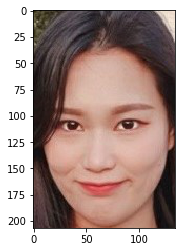

emotion:  Happy!
percent:  0.99226177


In [35]:
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()

emotion = "Happy!" if np.argmax(prediction) == 1 else "Neutral"

print("emotion: ", emotion)
print("percent: ", prediction[0][1])

In [ ]:
import tensorflow as tf
with tf.device('/device:GPU:1'):
    
    #VGG-Face model
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

                ...
                
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))